Using this to import the required libraries

In [1]:
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np

### Reading the data: Sample example

In [2]:
pwd

'/Volumes/GoogleDrive/My Drive/UCSD Acads/Year 3/Quarter 2/Programming for DS/Project/ECE143_Project/Local Notebooks'

In [3]:
import sys

In [4]:
sys.path[0]

'/Volumes/GoogleDrive/My Drive/UCSD Acads/Year 3/Quarter 2/Programming for DS/Project/ECE143_Project/Local Notebooks'

In [5]:
sys.path[0]+'/../Datasets/FPA_FOD_20170508.sqlite'

'/Volumes/GoogleDrive/My Drive/UCSD Acads/Year 3/Quarter 2/Programming for DS/Project/ECE143_Project/Local Notebooks/../Datasets/FPA_FOD_20170508.sqlite'

In [6]:
sys.path[0]

'/Volumes/GoogleDrive/My Drive/UCSD Acads/Year 3/Quarter 2/Programming for DS/Project/ECE143_Project/Local Notebooks'

In [7]:
conn = sqlite3.connect('../Datasets/FPA_FOD_20170508.sqlite')

In [8]:
conn

### Dataset description: Important keys

Here are some useful keys needed for extraction from the dataset
- FIRE_YEAR
- DISCOVERY_DATE
- FIRE_SIZE: Area in hectares
- FIRE_SIZE_CLASS: (A=greater than 0 but less than or equal to 0.25 acres, B=0.26-9.9 acres, C=10.0-99.9 acres, D=100-299 acres, E=300 to 999 acres, F=1000 to 4999 acres, and G=5000+ acres)
- LATITUDE
- LONGITUDE
- STATE

In [9]:
data_dates = pd.read_sql_query("SELECT fire_year, discovery_date FROM fires;", conn)

In [10]:
data_size = pd.read_sql_query("SELECT fire_size, fire_size_class FROM fires;", conn)

In [11]:
data_location = pd.read_sql_query("SELECT latitude, longitude, state FROM fires;", conn)

### Checking the data statistics

In [12]:
data_dates_arr = data_dates['DISCOVERY_DATE']

In [13]:
fire_year_arr = data_dates['FIRE_YEAR']

In [14]:
fire_size_arr = data_size['FIRE_SIZE']

In [15]:
len(fire_size_arr)

1880465

In [16]:
import matplotlib.pyplot as plt

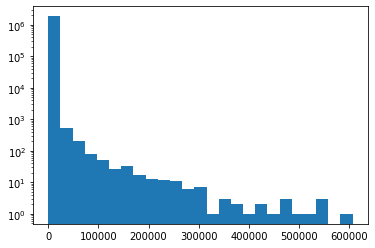

In [17]:
plt.yscale('log')
fire_size_hist = plt.hist(fire_size_arr,25)

In [18]:
fire_size_class_arr = data_size['FIRE_SIZE_CLASS']

Checking the location statistics

In [19]:
lat_arr = data_location['LATITUDE']

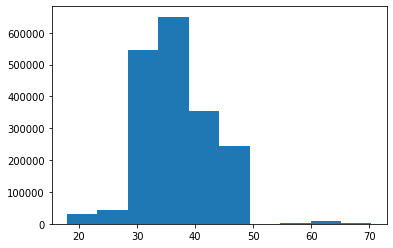

In [113]:
plt.hist(lat_arr);

In [21]:
long_arr = data_location['LONGITUDE']

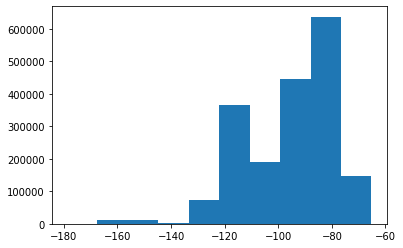

In [114]:
plt.hist(long_arr);

### Show some basic data correlations

All data correlations

In [23]:
wildfire_data = pd.read_sql_query("SELECT fire_size, latitude, longitude FROM fires;", conn)

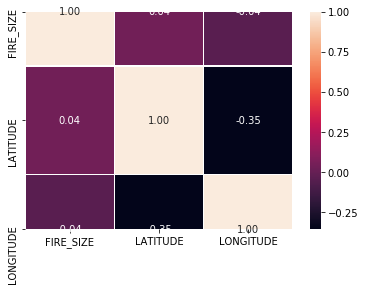

In [24]:
f,ax = plt.subplots()
svm = sns.heatmap(wildfire_data.corr(), annot = True, linewidths = .5, fmt = '.2f', ax = ax)
plt.show()
figure = svm.get_figure()

Small fire correlations

In [25]:
fire_size_class_arr[0]

'A'

In [26]:
len(fire_size_class_arr)

1880465

In [27]:
size_key = 'G'

In [28]:
large_size_wildfire_data = {}

In [29]:
large_size_wildfire_data.update({'FIRE_SIZE':[fire_size_arr[i] for i in range(len(fire_size_arr)) \
                                              if fire_size_class_arr[i]==size_key]})

In [30]:
large_size_wildfire_data.update({'LATITUDE':[lat_arr[i] for i in range(len(fire_size_arr)) \
                                              if fire_size_class_arr[i]==size_key]})

In [31]:
large_size_wildfire_data.update({'LONGITUDE':[long_arr[i] for i in range(len(fire_size_arr)) \
                                              if fire_size_class_arr[i]==size_key]})

In [32]:
large_size_wildfire_data.update({'DISCOVERY_DATE':[data_dates_arr[i] for i in range(len(fire_size_arr)) \
                                              if fire_size_class_arr[i]==size_key]})

In [33]:
large_size_wildfire_data.update({'FIRE_YEAR':[fire_year_arr[i] for i in range(len(fire_size_arr)) \
                                              if fire_size_class_arr[i]==size_key]})

In [34]:
large_size_wildfire_data_pd = pd.DataFrame(large_size_wildfire_data)

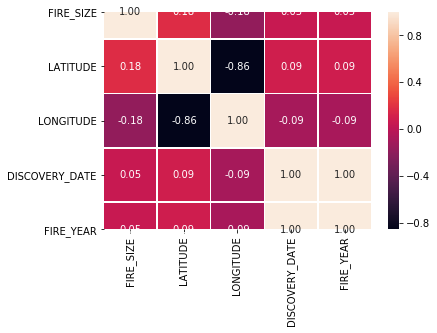

In [35]:
f,ax = plt.subplots()
svm = sns.heatmap(large_size_wildfire_data_pd.corr(), annot = True, linewidths = .5, fmt = '.2f', ax = ax)
plt.show()
figure = svm.get_figure()

###  Data filtering: By Area

Based on the observed data, it is decided to specifically geolocate, i terms of latitude and longitude, where the largest of these fires are occuring. 

Fires of category G are considered, with areas greater than 5000 hectares

In [42]:
large_fire_len = len(large_size_wildfire_data['FIRE_SIZE'])

(array([3.089e+03, 3.650e+02, 1.210e+02, 6.000e+01, 3.500e+01, 2.700e+01,
        2.000e+01, 1.600e+01, 8.000e+00, 7.000e+00, 7.000e+00, 4.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 4.000e+00, 1.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00]),
 array([  5000.  ,  35097.25,  65194.5 ,  95291.75, 125389.  , 155486.25,
        185583.5 , 215680.75, 245778.  , 275875.25, 305972.5 , 336069.75,
        366167.  , 396264.25, 426361.5 , 456458.75, 486556.  , 516653.25,
        546750.5 , 576847.75, 606945.  ]),
 <a list of 20 Patch objects>)

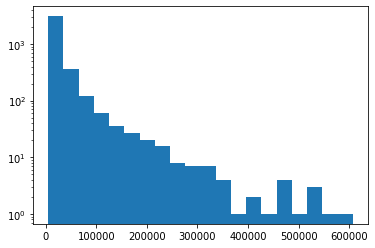

In [43]:
plt.yscale('log')
plt.hist(large_size_wildfire_data['FIRE_SIZE'],bins=20)

The above histogram shows the distribution of the large sized fires. 

In [44]:
min(large_size_wildfire_data['FIRE_SIZE'])

5000.0

In [45]:
max(large_size_wildfire_data['FIRE_SIZE'])

606945.0

In [46]:
large_size_wildfire_data.keys()

dict_keys(['FIRE_SIZE', 'LATITUDE', 'LONGITUDE', 'DISCOVERY_DATE', 'FIRE_YEAR'])

(array([  8.,   1.,   0.,  75.,  27.,  38., 134., 190., 345., 230., 220.,
        178., 346., 378., 316., 372., 178.,  87.,   0.,   0.,   0.,   0.,
          1.,   6.,  41.,  77., 229., 205.,  85.,   6.]),
 array([19.8304768 , 21.49777757, 23.16507835, 24.83237912, 26.49967989,
        28.16698067, 29.83428144, 31.50158221, 33.16888299, 34.83618376,
        36.50348453, 38.17078531, 39.83808608, 41.50538685, 43.17268763,
        44.8399884 , 46.50728917, 48.17458995, 49.84189072, 51.50919149,
        53.17649227, 54.84379304, 56.51109381, 58.17839459, 59.84569536,
        61.51299613, 63.18029691, 64.84759768, 66.51489845, 68.18219923,
        69.8495    ]),
 <a list of 30 Patch objects>)

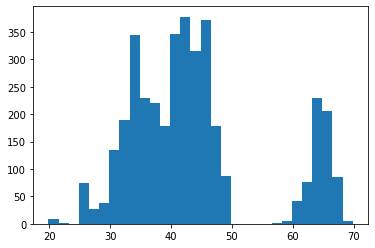

In [47]:
plt.hist(large_size_wildfire_data['LATITUDE'],bins=30)

(array([ 28.,  63., 117., 115., 102.,  76.,  79.,  79.,   0.,   0.,   0.,
          0.,   0., 155., 447., 525., 582., 244., 212., 303., 211., 122.,
        109.,  27.,   6.,   5.,  42., 110.,   9.,   5.]),
 array([-164.5693   , -161.5072671, -158.4452342, -155.3832013,
        -152.3211684, -149.2591355, -146.1971026, -143.1350697,
        -140.0730368, -137.0110039, -133.948971 , -130.8869381,
        -127.8249052, -124.7628723, -121.7008394, -118.6388065,
        -115.5767736, -112.5147407, -109.4527078, -106.3906749,
        -103.328642 , -100.2666091,  -97.2045762,  -94.1425433,
         -91.0805104,  -88.0184775,  -84.9564446,  -81.8944117,
         -78.8323788,  -75.7703459,  -72.708313 ]),
 <a list of 30 Patch objects>)

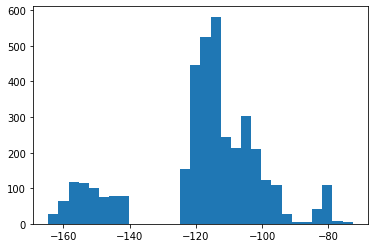

In [48]:
plt.hist(large_size_wildfire_data['LONGITUDE'],bins=30)

Based on the above histograms, it is desired to locate the fires. 

### Plotting on a basemap

In [213]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
import matplotlib as mpl

The fires plotted have area grater than 60,000 hectares

#### USA except Alaska

/Users/aditya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


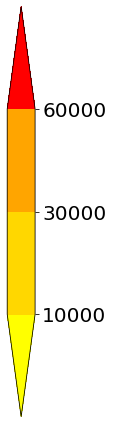

In [330]:
fig, ax = plt.subplots(figsize=(0.5, 15))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.colors.ListedColormap(['gold', 'orange'])
cmap.set_over('red')
cmap.set_under('yellow')

bounds = [10000,30000,60000]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb3 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                #boundaries=[-10] + bounds + [10],
                                extend='both',
                                extendfrac='auto',
                                ticks=bounds,
                                spacing='uniform',
                                orientation='vertical')
ticklabs = cb3.ax.get_yticklabels()
cb3.ax.set_yticklabels(ticklabs, fontsize=20)
fig.show()

In [323]:
mpl.colorbar.ColorbarBase?

/Users/aditya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aditya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
/Users/aditya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


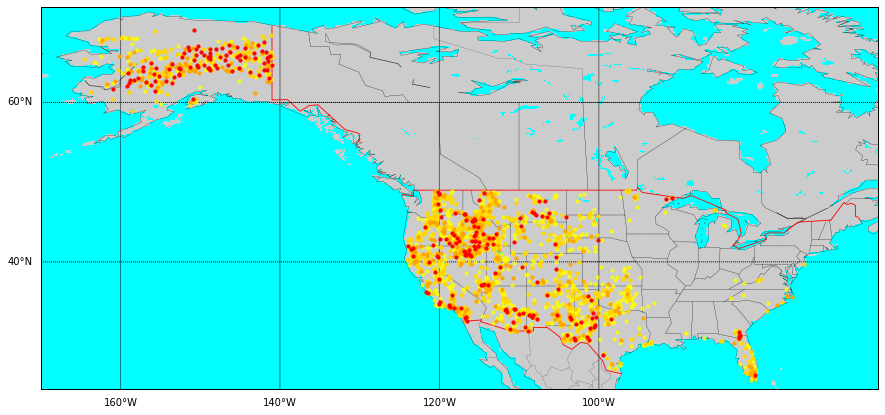

In [331]:
plt.subplots(figsize=[15,8])
map = Basemap(projection='cyl',llcrnrlat=24,urcrnrlat=72,\
            llcrnrlon=-170,urcrnrlon=-65,)
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.85,color='red')
map.drawstates(linewidth=0.15)
map.drawmapboundary()
map.drawparallels(np.arange(0.,90.,20),labels=[1,0,0,0],fontsize=10)
map.drawmeridians(np.arange(-160,-90,20),labels=[0,0,0,1],fontsize=10)
map.fillcontinents(color='lightgrey', zorder=1,lake_color='aqua')
map.drawlsmask(ocean_color='aqua',lakes=True,zorder=1)

yr_lower = 2000
yr_higher = 2015

## Large fires
lim_low = 65000
lim_high = 3000000
long_temp = [large_size_wildfire_data['LONGITUDE'][i] for i in range(large_fire_len) if \
             lim_low<=large_size_wildfire_data['FIRE_SIZE'][i]<lim_high and \
            yr_lower<large_size_wildfire_data['FIRE_YEAR'][i]<yr_higher]
lat_temp = [large_size_wildfire_data['LATITUDE'][i] for i in range(large_fire_len) if \
             lim_low<=large_size_wildfire_data['FIRE_SIZE'][i]<lim_high and \
            yr_lower<large_size_wildfire_data['FIRE_YEAR'][i]<yr_higher]

scat = map.scatter(long_temp, lat_temp,s=10);
scat.set_color('r')
#scat.set_alpha(0.5)
scat.set_zorder(12)


## Medium fires
lim_low = 30000
lim_high = 65000
long_temp = [large_size_wildfire_data['LONGITUDE'][i] for i in range(large_fire_len) if \
             lim_low<=large_size_wildfire_data['FIRE_SIZE'][i]<lim_high and \
            yr_lower<large_size_wildfire_data['FIRE_YEAR'][i]<yr_higher]
lat_temp = [large_size_wildfire_data['LATITUDE'][i] for i in range(large_fire_len) if \
             lim_low<=large_size_wildfire_data['FIRE_SIZE'][i]<lim_high and \
            yr_lower<large_size_wildfire_data['FIRE_YEAR'][i]<yr_higher]

scat = map.scatter(long_temp, lat_temp,s=10);
scat.set_color('orange')
#scat.set_alpha(0.85)
scat.set_zorder(11)


## Small fires
lim_low = 10000
lim_high = 30000
long_temp = [large_size_wildfire_data['LONGITUDE'][i] for i in range(large_fire_len) if \
             lim_low<=large_size_wildfire_data['FIRE_SIZE'][i]<lim_high and \
            yr_lower<large_size_wildfire_data['FIRE_YEAR'][i]<yr_higher]
lat_temp = [large_size_wildfire_data['LATITUDE'][i] for i in range(large_fire_len) if \
             lim_low<=large_size_wildfire_data['FIRE_SIZE'][i]<lim_high and \
            yr_lower<large_size_wildfire_data['FIRE_YEAR'][i]<yr_higher]

scat = map.scatter(long_temp, lat_temp,s=10);
scat.set_color('gold')
scat.set_alpha(1)
scat.set_zorder(10)

## Small fires
lim_low = 5000
lim_high = 10000
long_temp = [large_size_wildfire_data['LONGITUDE'][i] for i in range(large_fire_len) if \
             lim_low<=large_size_wildfire_data['FIRE_SIZE'][i]<lim_high and \
            yr_lower<large_size_wildfire_data['FIRE_YEAR'][i]<yr_higher]
lat_temp = [large_size_wildfire_data['LATITUDE'][i] for i in range(large_fire_len) if \
             lim_low<=large_size_wildfire_data['FIRE_SIZE'][i]<lim_high and \
            yr_lower<large_size_wildfire_data['FIRE_YEAR'][i]<yr_higher]

scat = map.scatter(long_temp, lat_temp,s=10);
scat.set_color('yellow')
scat.set_alpha(0.75)
scat.set_zorder(9)

plt.show()